---
title: "의사결정나무의 옵션 이해"
author: "강신성"
date: "2023-11-17"
categories: [tree]
---




> 의사결정나무의 여러 옵션들에 대해서 알아보자!

## 1. 라이브러리 imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree
import graphviz

#-#
import warnings
warnings.filterwarnings('ignore')

## 2. `max_features`

`# Data`

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
## step 1
X = pd.get_dummies(df_train.drop('charges', axis = 1), drop_first = True)
y = df_train.charges

## step 2
predictr = sklearn.tree.DecisionTreeRegressor(max_features = 4)

## step 3
predictr.fit(X, y)

DecisionTreeRegressor(max_features=4)

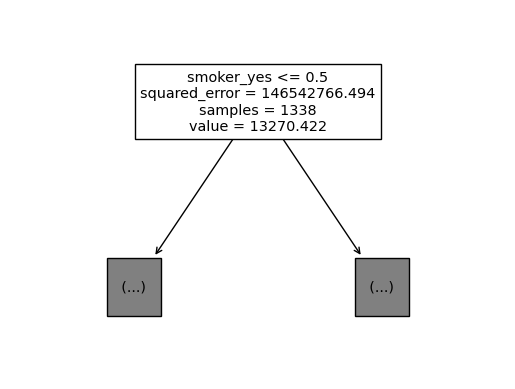

In [18]:
sklearn.tree.plot_tree(predictr, max_depth = 0, feature_names = X.columns.to_list());

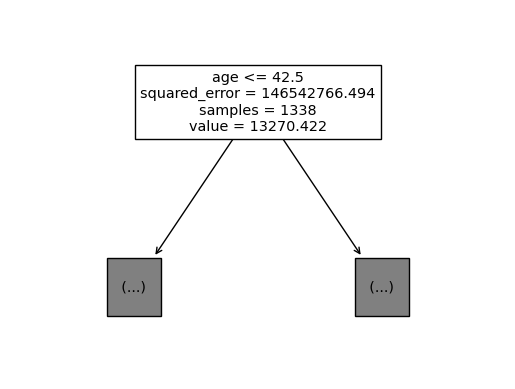

In [23]:
predictr.fit(X, y)
sklearn.tree.plot_tree(predictr, max_depth = 0, feature_names = X.columns.to_list());

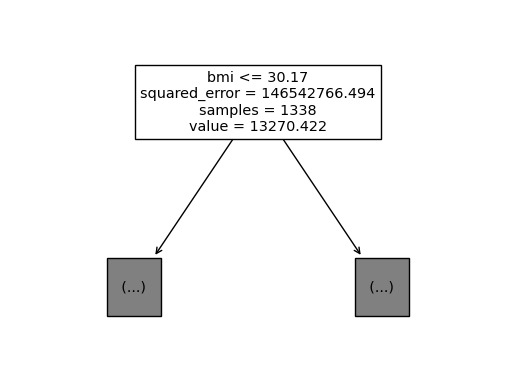

In [27]:
predictr.fit(X, y)
sklearn.tree.plot_tree(predictr, max_depth = 0, feature_names = X.columns.to_list());

> `max_features`를 4로 제한했을 때, `tree`가 적합한 결과는 계속해서 달라진다.

In [28]:
len(X.columns)

8

> `max_features = 4`의 의미는 설명변수들 중 4개만 임의로 뽑아서 그중 **최적의 변수**와 **최적의 c**를 찾겠다는 의미이다. (정말 가중치 없이 랜덤으로 막 뽑아버린다.)
>
> 이 경우는 `smoker_yes`가 가장 중요하여 절반 정도는 제일 위에 위치하게 된다.

## 3. `random_state`

> 그럼 결과값들이 튀지 않도록, 같은 데이터셋의 분석이 가능하도록 하려면?

In [29]:
## step 1
X = pd.get_dummies(df_train.drop('charges', axis = 1), drop_first = True)
y = df_train.charges

## step 2
predictr = sklearn.tree.DecisionTreeRegressor(max_features = 4, random_state = 42)

## step 3
predictr.fit(X, y)

DecisionTreeRegressor(max_features=4, random_state=42)

> 단순하다. `train_test_split()`이나, `np.random.rand()`나... 무작위로 뽑는 것에서 흔히 나타나는 `random_state`를 지정해주면 된다.

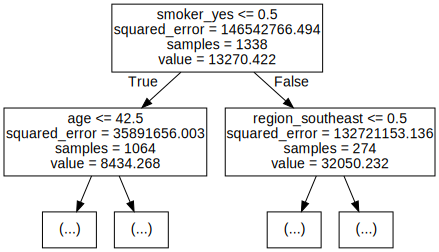

In [43]:
graphviz.Source(sklearn.tree.export_graphviz(
    predictr,
    max_depth = 1,
    feature_names = X.columns.to_list()
))

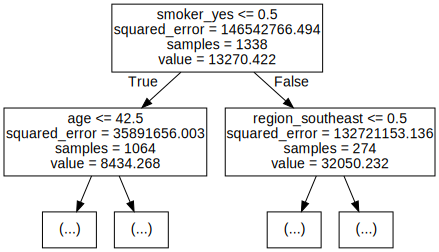

In [44]:
predictr.fit(X, y)
graphviz.Source(sklearn.tree.export_graphviz(
    predictr,
    max_depth = 1,
    feature_names = X.columns.to_list()
))

> 몇 번을 시도해도 같은 결과가 나올 것이다...

## 4. `.fit(sample_weight = [])`

> 무게, 그러니까 가중치를 부여해주는 옵션이다. 특정 값을 중심으로 피팅을 해야 할 경우나, 값이 겹쳐있는 경우 유용한 옵션이다.

`# 예제 1` 아래의 데이터를 생각해보자.

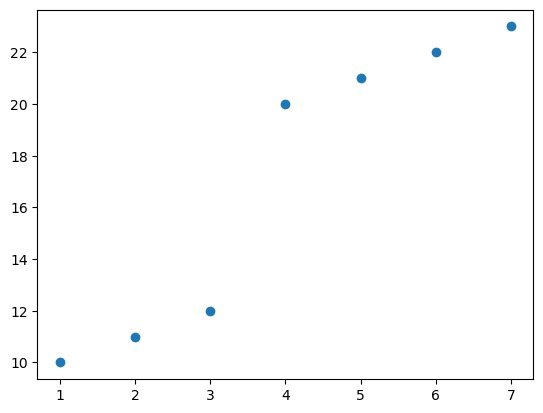

In [45]:
X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y = np.array([10,11,12,20,21,22,23])
plt.plot(X, y, 'o')

> 여기서 어떤 $c$값을 택해야 할까? 당연히 3.5정도가 되겠지...

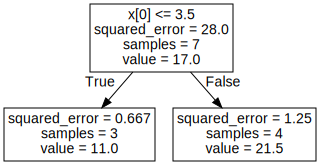

In [47]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 1)
predictr.fit(X, y)
graphviz.Source(sklearn.tree.export_graphviz(predictr))

`# 예제 2` 유사하지만 다른 그림

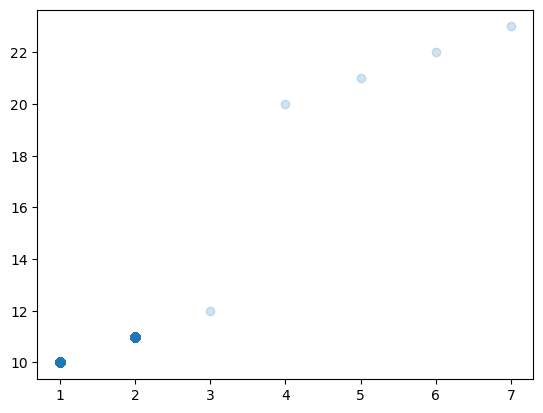

In [48]:
X = np.array([1]*5000+[2]*5000+[3,4,5,6,7]).reshape(-1,1)
y = np.array([10]*5000+[11]*5000+[12,20,21,22,23])
plt.plot(X, y, 'o', alpha = 0.2)

> 이 경우 산점도는 비슷하게 그려지지만, 1과 2에 5000개의 데이터들이 관측되었다. 따라서 1.5 근처에 나누는 게 적합 점수가 높게 나올 것이다...

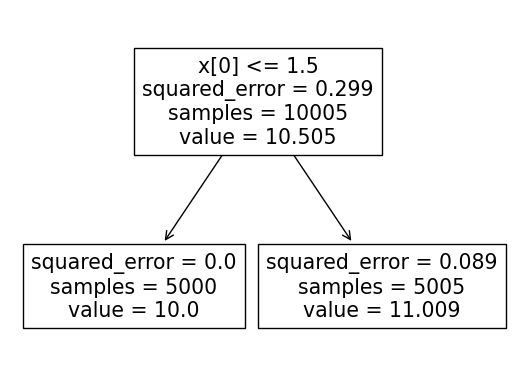

In [52]:
## 실제로 적합해보면...
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 1)
predictr.fit(X, y)
graphviz.Source(sklearn.tree.plot_tree(predictr));

`# 예제 3` 가중치 부여

* 처음의 데이터를 사용해서 위의 데이터를 분석한 것과 같게 분석을 해보자.

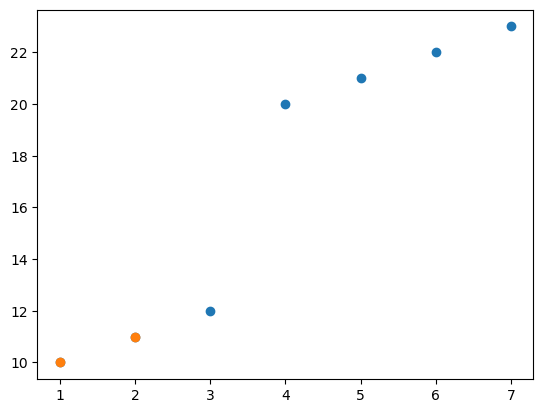

In [54]:
X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y = np.array([10,11,12,20,21,22,23])

plt.plot(X, y, 'o')
plt.plot(X[:2], y[:2], 'o')

> 1번과 2번 데이터를 맞추는 것이 다른 것들보다 5000배 정도 더 중요하다고 하면...

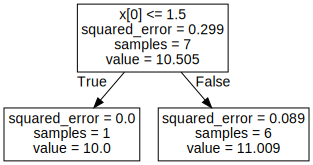

In [55]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 1)
predictr.fit(X, y, sample_weight = [5000, 5000, 1,1,1,1,1])
graphviz.Source(sklearn.tree.export_graphviz(predictr))

> 이런 식으로 똑같은 결과를 볼 수 있다. 이 때, 샘플의 사이즈만 다르다.